In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/raw/lap_times.csv")
df = df[['raceId','driverId','lap','milliseconds']]
df.head()

,raceId,driverId,lap,milliseconds
0,841,20,1,98109
1,841,20,2,93006
2,841,20,3,92713
3,841,20,4,92803
4,841,20,5,92342


In [3]:
df['raceId'].nunique()

544

In [4]:
df['raceId'].value_counts().head()

raceId
354    1649
870    1621
846    1604
869    1580
59     1558
Name: count, dtype: int64

In [5]:
df['driverId'].value_counts().head()

driverId
4     21829
1     20297
8     18623
20    16427
18    16272
Name: count, dtype: int64

In [6]:
RACE_ID = 354

In [7]:
DRIVER_ID = 10

In [8]:
race_df = df[df['raceId'] == RACE_ID]
driver_df = race_df[race_df['driverId'] == DRIVER_ID]
race_df.head()
driver_df.head()

,raceId,driverId,lap,milliseconds
381283,354,10,1,91580
381284,354,10,2,81385
381285,354,10,3,80785
381286,354,10,4,81281
381287,354,10,5,80915


In [9]:
race_df.shape

(1649, 4)

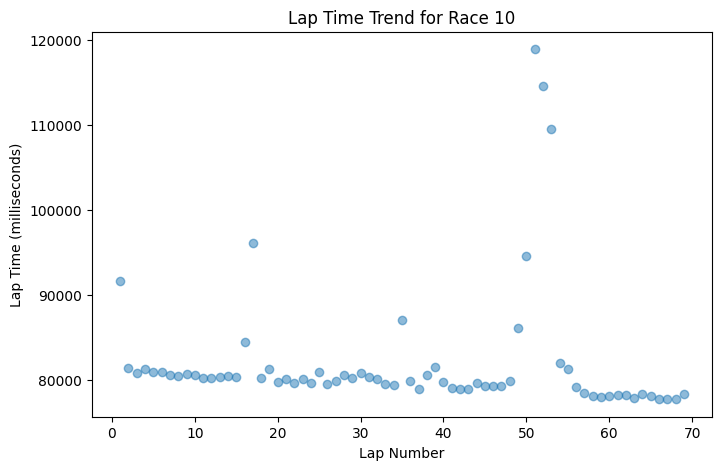

In [10]:
plt.figure(figsize=(8, 5))
plt.scatter(driver_df['lap'], driver_df['milliseconds'], alpha=0.5)
plt.xlabel("Lap Number")
plt.ylabel("Lap Time (milliseconds)")
plt.title(f"Lap Time Trend for Race {DRIVER_ID}")
plt.show()

In [11]:
X = driver_df['lap'].values.reshape(-1, 1)
Y = driver_df['milliseconds'].values.reshape(-1, 1)

In [12]:
X_mean = X.mean()
X_std = X.std()
X_scaled = (X - X_mean) / X_std

In [13]:
def cost_function(X, Y, w, b):
    m = len(Y)
    Y_pred = w * X + b
    
    cost = (1/(2*m)) * np.sum((Y_pred - Y) ** 2)
    return cost

In [14]:
def gradient_descent(X, Y, w, b, learning_rate, iterations):
    m = len(Y)
    cost_history = []

    for i in range(iterations):
        Y_pred = w * X + b

        dw = (1/m) * np.sum((Y_pred - Y) * X)
        db = (1/m) * np.sum(Y_pred - Y)

        w = w - learning_rate * dw
        b = b - learning_rate * db

        cost_history.append(cost_function(X, Y, w, b))
    return w, b, cost_history

Final Learned Parameters:
w (slope): 207.54120180750178
b (intercept): 82096.81159420218

Actual Vs Predicted Lap Time for DriverID - 10
Lap 1 → Actual: 91580 ms | Predicted: 81742 ms
Lap 2 → Actual: 81385 ms | Predicted: 81752 ms
Lap 3 → Actual: 80785 ms | Predicted: 81763 ms
Lap 4 → Actual: 81281 ms | Predicted: 81773 ms
Lap 5 → Actual: 80915 ms | Predicted: 81784 ms
Lap 6 → Actual: 80900 ms | Predicted: 81794 ms
Lap 7 → Actual: 80598 ms | Predicted: 81805 ms
Lap 8 → Actual: 80412 ms | Predicted: 81815 ms
Lap 9 → Actual: 80630 ms | Predicted: 81825 ms
Lap 10 → Actual: 80501 ms | Predicted: 81836 ms


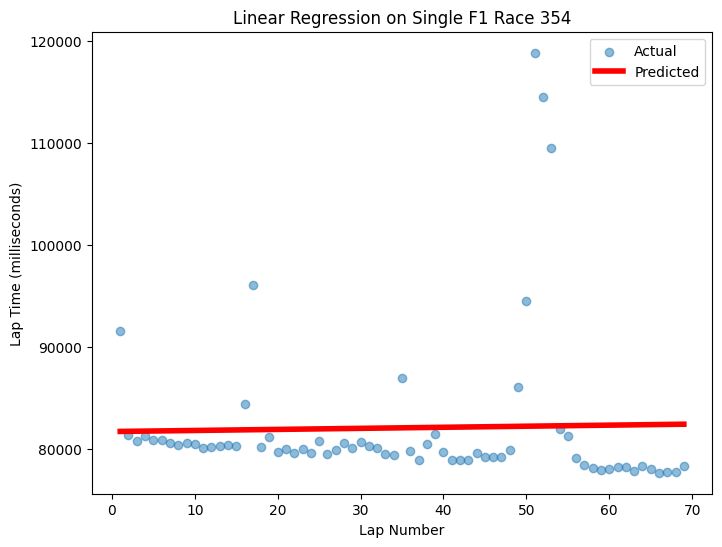

In [19]:
# Train model
w, b, cost_history = gradient_descent(
    X_scaled, Y, w, b, learning_rate, iterations
)

# Generate predictions FIRST
Y_pred = w * X_scaled + b

print("Final Learned Parameters:")
print(f"w (slope): {w}")
print(f"b (intercept): {b}")

print("\nActual Vs Predicted Lap Time for DriverID - 10")
for i in range(10):
    print(
        f"Lap {int(X[i][0])} → "
        f"Actual: {int(Y[i][0])} ms | "
        f"Predicted: {int(Y_pred[i][0])} ms"
    )

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.5, label="Actual")
plt.plot(X, Y_pred, color='red', linewidth=4, label="Predicted")

plt.xlabel("Lap Number")
plt.ylabel("Lap Time (milliseconds)")
plt.title(f"Linear Regression on Single F1 Race {RACE_ID}")
plt.legend()
plt.show()